In [20]:
!ls

airbnb_cleaned.csv  Airbnb_Open_Data.xlsx  drive


In [21]:
!pip install pandas numpy matplotlib seaborn openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

In [22]:
df = pd.read_excel("Airbnb_Open_Data.xlsx")
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [23]:
print("Shape:", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nData info:")
print(df.info())
print("\nStatistics:")
print(df.describe())

Shape: (102599, 26)

Column names: ['id', 'NAME', 'host id', 'host_identity_verified', 'host name', 'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country', 'country code', 'instant_bookable', 'cancellation_policy', 'room type', 'Construction year', 'price', 'service fee', 'minimum nights', 'number of reviews', 'last review', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365', 'house_rules', 'license']

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4 

In [24]:
print("Missing values per column:\n", df.isnull().sum())
print("\nTotal duplicates:", df.duplicated().sum())
df = df.drop_duplicates()

Missing values per column:
 id                                     0
NAME                                 270
host id                                0
host_identity_verified               289
host name                            408
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365             

In [25]:
df['price_clean'] = pd.to_numeric(df['price'], errors='coerce')

print("Price column cleaned:")
print(df['price_clean'].describe())

Price column cleaned:
count    101811.000000
mean        625.355580
std         331.672649
min          50.000000
25%         340.000000
50%         625.000000
75%         913.000000
max        1200.000000
Name: price_clean, dtype: float64


In [26]:
df['last_review'] = pd.to_datetime(df['last review'], errors='coerce')

print("Dates parsed. Example values:")
print(df['last_review'].head())


Dates parsed. Example values:
0   2021-10-19
1   2022-05-21
2          NaT
3   2019-07-05
4   2018-11-19
Name: last_review, dtype: datetime64[ns]


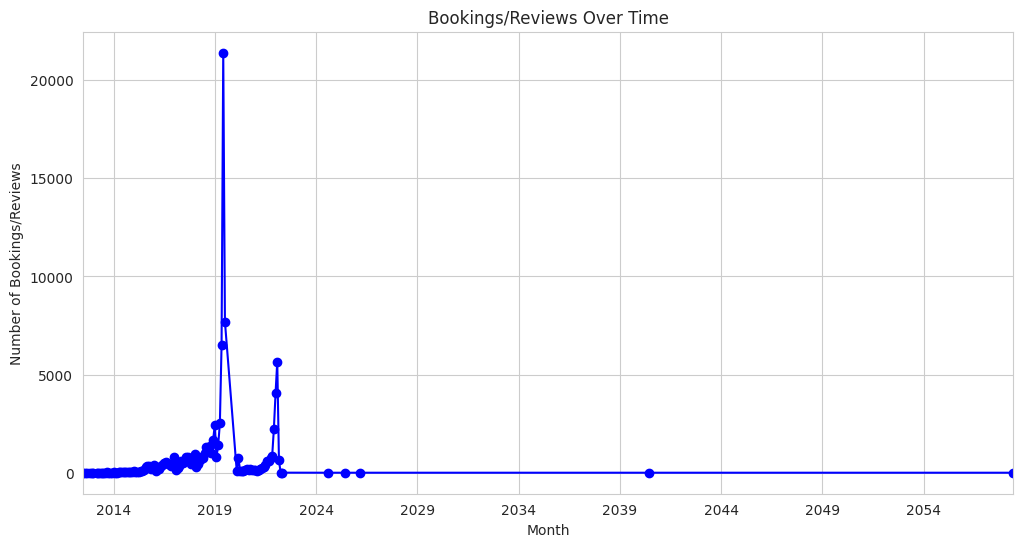

In [27]:
df['year_month'] = df['last_review'].dt.to_period('M')
monthly_counts = df.groupby('year_month').size()

plt.figure(figsize=(12,6))
monthly_counts.plot(kind='line', marker='o', color='blue')
plt.title("Bookings/Reviews Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Bookings/Reviews")
plt.show()

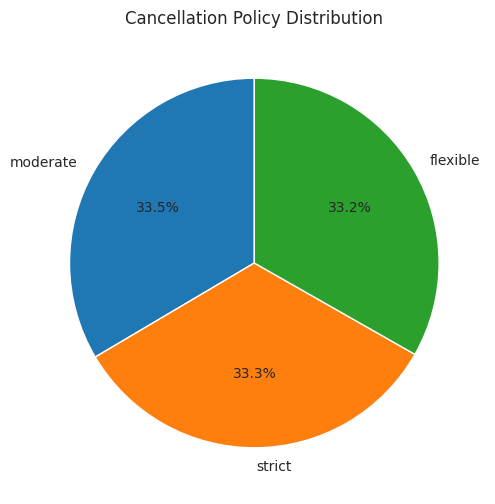

In [28]:
cancel_counts = df['cancellation_policy'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(cancel_counts, labels=cancel_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Cancellation Policy Distribution")
plt.show()

/tmp/ipython-input-1386184762.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.index, y=top_locations.values, palette="viridis")


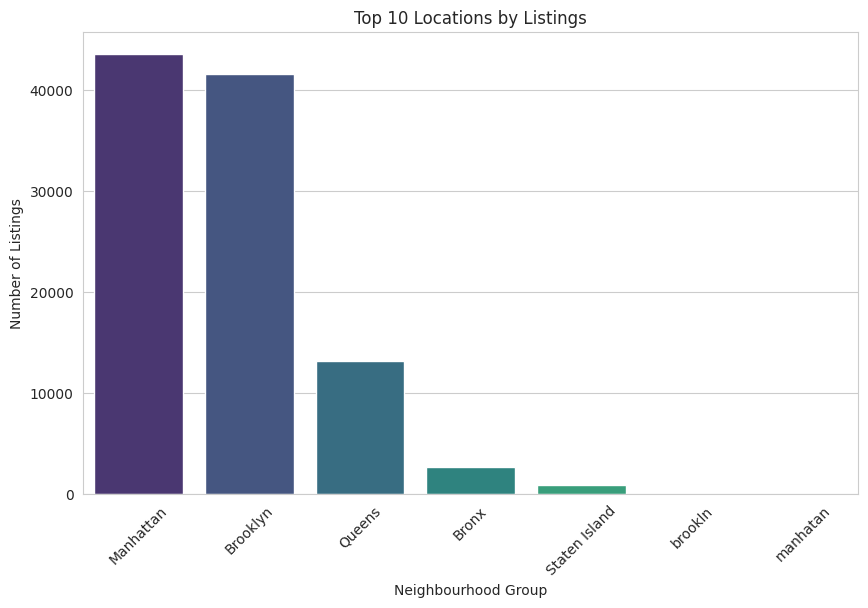

In [29]:
top_locations = df['neighbourhood group'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_locations.index, y=top_locations.values, palette="viridis")
plt.title("Top 10 Locations by Listings")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45)
plt.show()

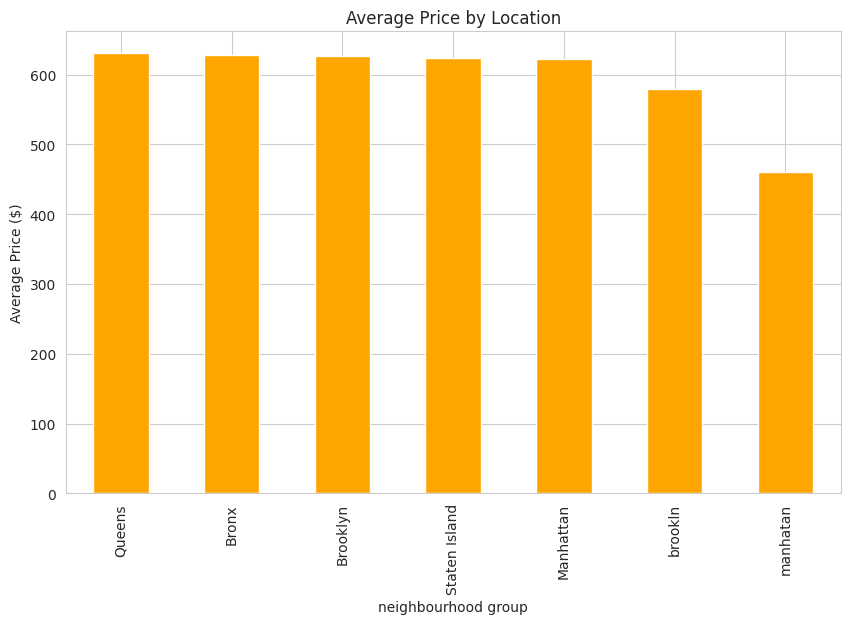

In [30]:
avg_price = df.groupby('neighbourhood group')['price_clean'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
avg_price.plot(kind='bar', color='orange')
plt.title("Average Price by Location")
plt.ylabel("Average Price ($)")
plt.show()

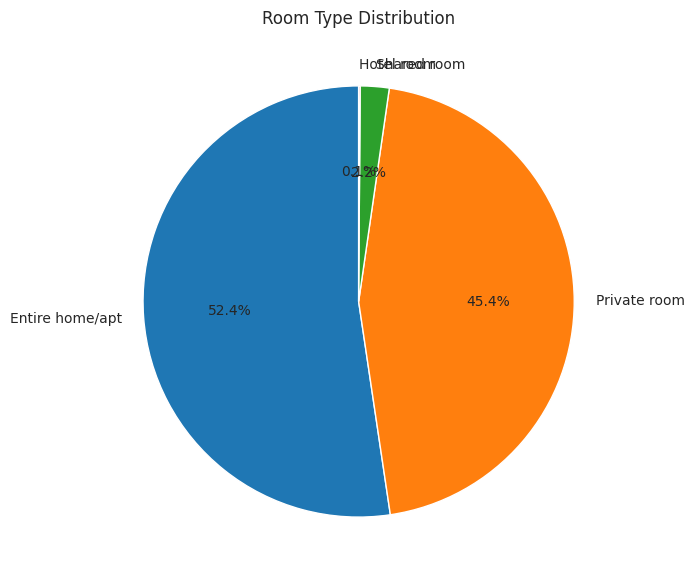

In [31]:
room_counts = df['room type'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(room_counts, labels=room_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Room Type Distribution")
plt.show()

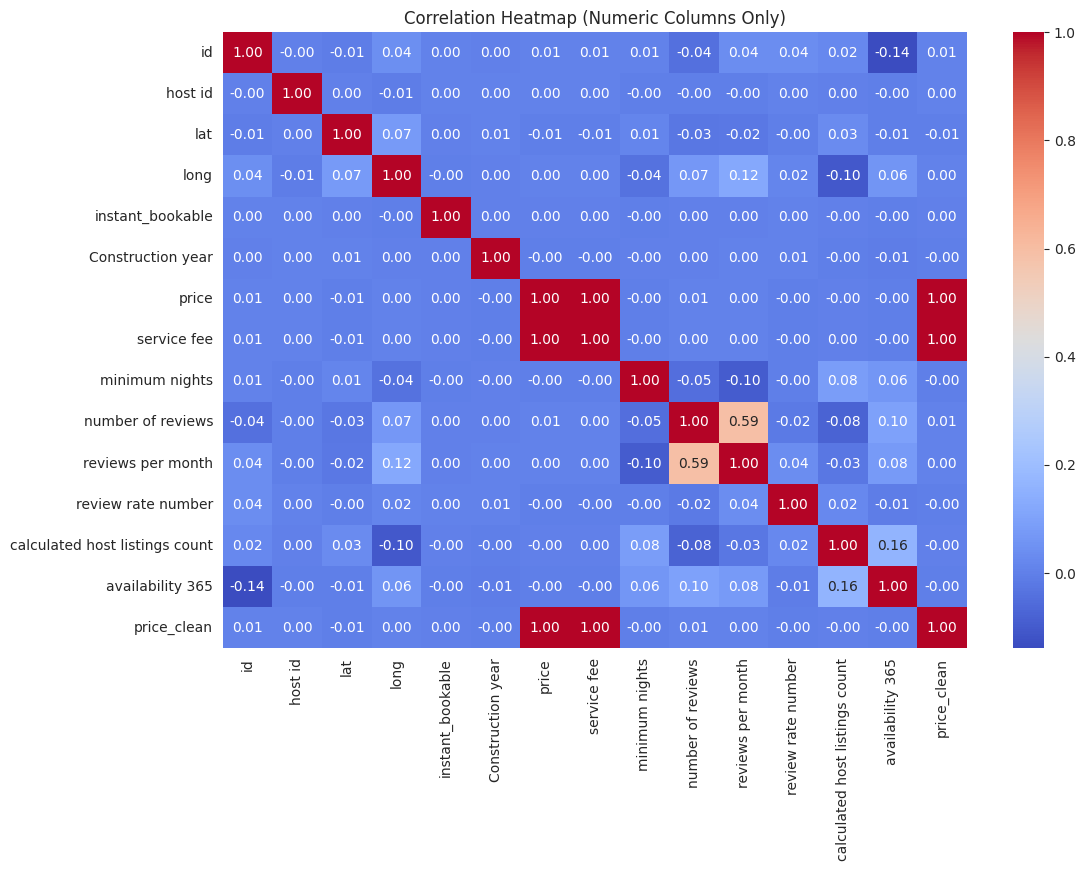

In [32]:
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()

In [33]:
df.to_csv("airbnb_cleaned.csv", index=False)
print("Cleaned dataset saved as airbnb_cleaned.csv")

Cleaned dataset saved as airbnb_cleaned.csv


In [34]:
!ls

airbnb_cleaned.csv  Airbnb_Open_Data.xlsx  drive


In [35]:
from google.colab import files
files.download("airbnb_cleaned.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>